# 套件

In [596]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
sns.set()
sns.set_palette("hls", 8)
from sklearn import preprocessing, linear_model

# 載入數據集

In [597]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data["MEDV"] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [598]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 資料處理

## 離群值處理

- MEDV箱型圖

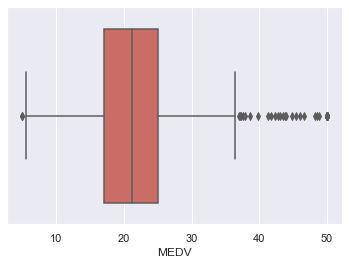

In [599]:
sns.boxplot(data.MEDV)

- 剔除離群值

In [600]:
drop = []
for i in range(data.shape[0]):
    if data.iloc[i,13] > 25+1.5*(25-17.025):
        drop.append(i)
    elif data.iloc[i,13] < 17.025-1.5*(25-17.025):
        drop.append(i)
data = data.drop(index = drop)

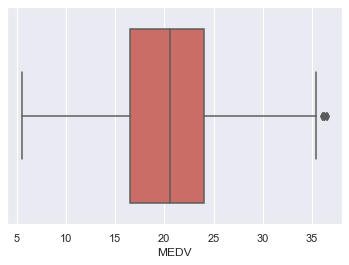

In [601]:
sns.boxplot(data.MEDV)

## 離散化(減少連續變數雜訊影響)

- DIS(與就業中心距離)

In [602]:
bins2 = [1,2.5, 5, 13] 
data['DIS'] = pd.cut(data['DIS'].astype('float64'), bins2, right=False, labels=['0', '1', '2'])
print(pd.value_counts(data.DIS)) 

0    172
1    169
2    125
Name: DIS, dtype: int64


- AGE(擁有屋為1940前建成之比例)

In [603]:
bins2 = [0 ,  40 , 60 , 80 ,95, 101] 
data['AGE'] = pd.cut(data['AGE'].astype('float64'), bins2, right=False, labels=['0', '1', '2', '3', '4'])
print(pd.value_counts(data.AGE)) 

3    117
4    104
0     97
2     75
1     73
Name: AGE, dtype: int64


## 標準化

In [604]:
normal = ['CRIM','ZN','INDUS','NOX','RAD','TAX','PTRATIO','B','LSTAT','RM']

In [605]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
data[normal]=sc.fit_transform(data[normal])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.435149,0.334919,-1.336816,0.0,-0.160527,0.686751,2,1,-0.987089,-0.695549,-1.609553,0.451503,-1.197647,24.0
1,-0.432601,-0.477604,-0.635435,0.0,-0.748894,0.419254,2,1,-0.873232,-1.016283,-0.396584,0.451503,-0.597069,21.6
2,-0.432603,-0.477604,-0.635435,0.0,-0.748894,1.746319,2,1,-0.873232,-1.016283,-0.396584,0.408469,-1.334799,34.7
3,-0.431986,-0.477604,-1.355972,0.0,-0.842692,1.421500,1,2,-0.759375,-1.135074,0.040085,0.427501,-1.492162,33.4
4,-0.427533,-0.477604,-1.355972,0.0,-0.842692,1.680313,1,2,-0.759375,-1.135074,0.040085,0.451503,-1.147118,36.2


## 變數相關性

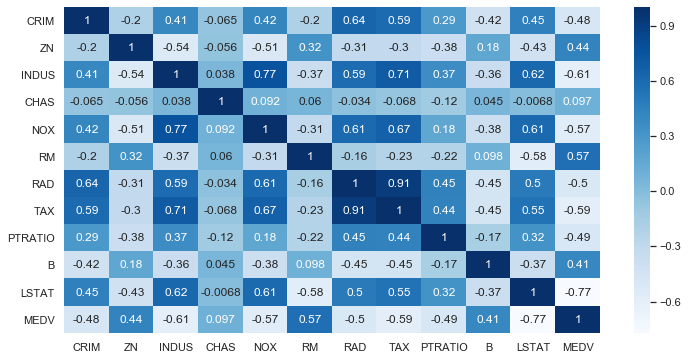

In [606]:
cor = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Blues',annot=True)

剔除相關性低的CHAS

# 資料集切割

In [607]:
x=data.drop(['CHAS','MEDV'], axis=1)
y=data.MEDV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=426)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(372, 12) (372,)
(94, 12) (94,)


# 線性迴歸模型

## 訓練

In [608]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 預測

In [609]:
y_predict = reg.predict(x_test)

## 測試集預測結果

R-Squared: 0.7190779007721502


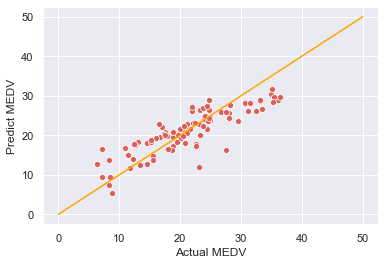

In [610]:
sns.scatterplot(y_test,y_predict)
sns.lineplot([0,50],[0,50],color = "orange")
plt.xlabel('Actual MEDV')
plt.ylabel('Predict MEDV')
print("R-Squared:",reg.score(x_test,y_test))